# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
img = cv2.imread(fileName)

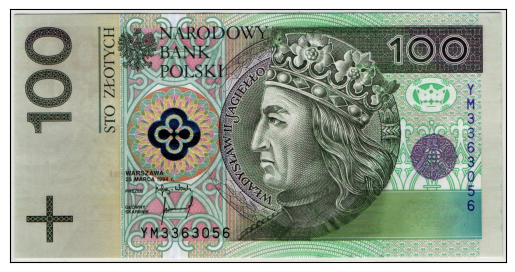

In [3]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## Transformation to gray scale

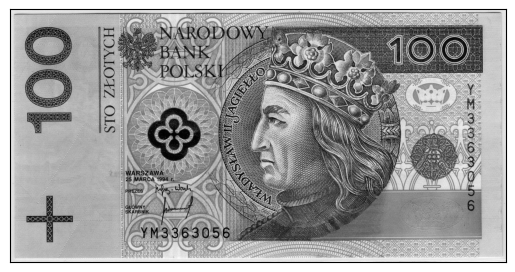

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Decomposition

In [5]:
decomposed_img = []
masks = [2 ** i for i in range(8)]

for mask in masks:
    decomposed_img.append((img & mask)//mask)

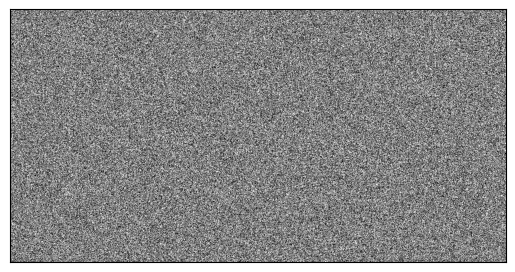

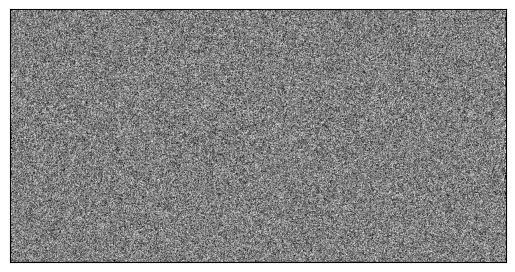

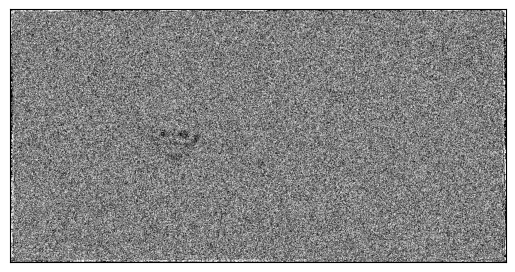

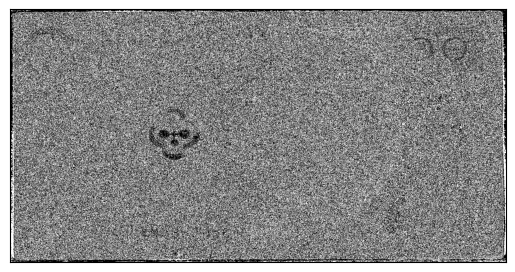

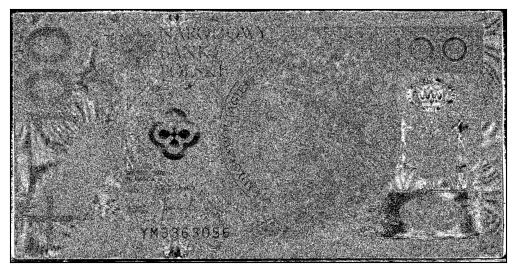

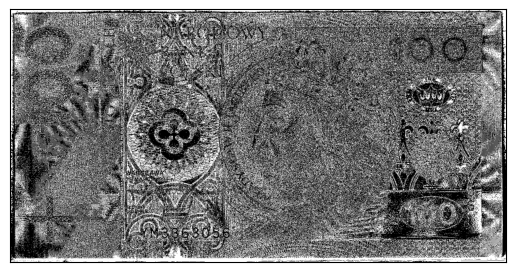

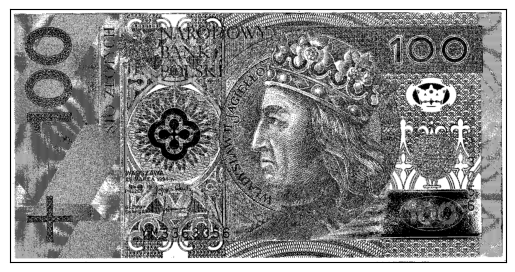

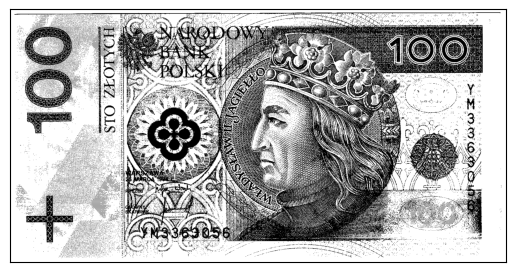

In [6]:
for d_img in decomposed_img:
    plt.imshow(d_img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Reconstruction

In [7]:
def reconstruct_and_show(bit_numbers, decomposed_img):
    i = bit_numbers[0]
    res = decomposed_img[i] * 2 ** i
    for j in range(1, len(bit_numbers)):
        i = bit_numbers[j]
        res = cv2.add(res, decomposed_img[i] * 2 ** i)

    plt.imshow(res, cmap='gray')
    plt.title(f"Bits number: {", ".join(sorted([str(i + 1) for i in bit_numbers]))}")
    plt.yticks([])
    plt.xticks([])
    plt.show()

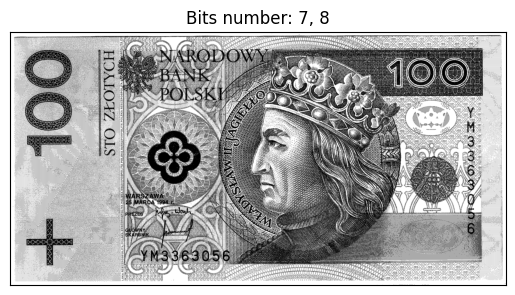

In [8]:
reconstruct_and_show([7, 6], decomposed_img)

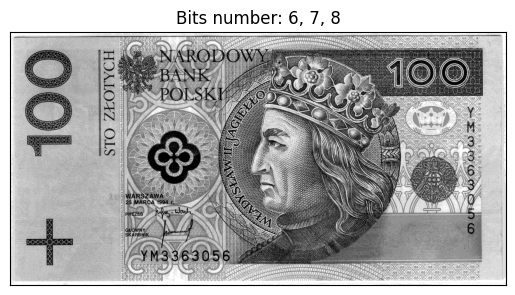

In [9]:
reconstruct_and_show([7, 6, 5], decomposed_img)

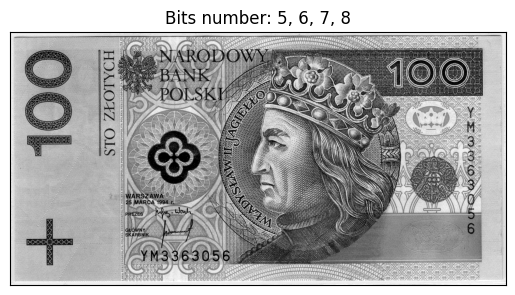

In [10]:
reconstruct_and_show([7, 6, 4, 5], decomposed_img)

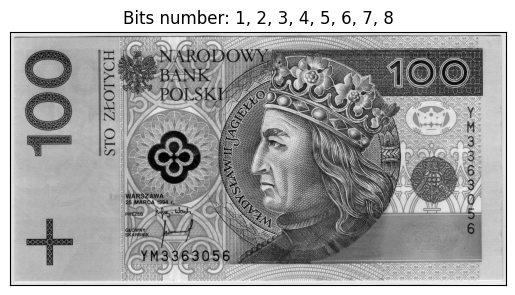

In [11]:
reconstruct_and_show([7, 6, 4, 5, 1, 2, 3, 0], decomposed_img)